### Simulation

In [9]:
from bmc.simulate import simulate
import numpy as np
import torch
import matplotlib.pyplot as plt

In [10]:
low = -20e-6
high = 20e-6
n_iso = 1000
mean = (low + high) / 2
std_dev = (high - low) / 6

# Erzeuge z_pos als Torch-Tensor
# z_pos = torch.normal(mean=mean, std=std_dev, size=(n_iso,))
# z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu
# z_pos = torch.clamp(z_pos, min=low, max=high)  # Clipping auf Bereich
# z_pos, _ = torch.sort(z_pos)  # Sortiere z_pos

z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)

# Visualisiere die Positionen
# plt.plot(z_pos.cpu().numpy(), 'o')  # Konvertiere für matplotlib zu numpy
# plt.show()

# Finde den Index der 0
# zero_index = torch.where(z_pos == 0)[0].item()
# print(f"Index von 0: {zero_index}")

print(np.linspace(-1, 1, 10))
print(torch.tensor(np.linspace(-1, 1, 10), dtype=torch.float64))


[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000], dtype=torch.float64)


In [11]:
seq_path_gauss = 'seq_lib/1_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 0.1
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = False
plt_range = [0, 4]
# z_pos = np.linspace(-1e-6, 1e-6, 10001)
iso_select = [-5,0,5]
# z_pos = np.array([0])

In [12]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag, 
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/43 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 43/43 [00:37<00:00,  1.13it/s]

['rf at 0.0000s', 'rf at 0.0040s', 'gz at 0.0060s', 'rf at 0.0062s', 'rf at 0.0082s', 'rf at 0.0122s', 'gz at 0.0147s', 'rf at 0.0197s', 'rf at 0.0222s', 'rf at 0.0262s', 'gz at 0.0282s', 'rf at 0.0284s', 'rf at 0.0304s', 'rf at 0.0344s', 'gz at 0.0369s', 'rf at 0.0419s', 'rf at 0.0444s', 'rf at 0.0484s', 'gz at 0.0504s', 'rf at 0.0506s', 'rf at 0.0526s', 'rf at 0.0566s', 'gz at 0.0591s', 'rf at 0.0641s', 'rf at 0.0666s', 'rf at 0.0706s', 'gz at 0.0726s', 'rf at 0.0728s', 'rf at 0.0748s', 'rf at 0.0788s', 'gz at 0.0813s', 'rf at 0.0863s', 'rf at 0.0888s', 'rf at 0.0928s', 'gz at 0.0948s', 'rf at 0.0950s', 'rf at 0.0970s', 'rf at 0.1010s', 'gz at 0.1035s', 'rf at 0.1085s', 'rf at 0.1110s', 'gz at 0.1150s', 'adc at 0.1152s']


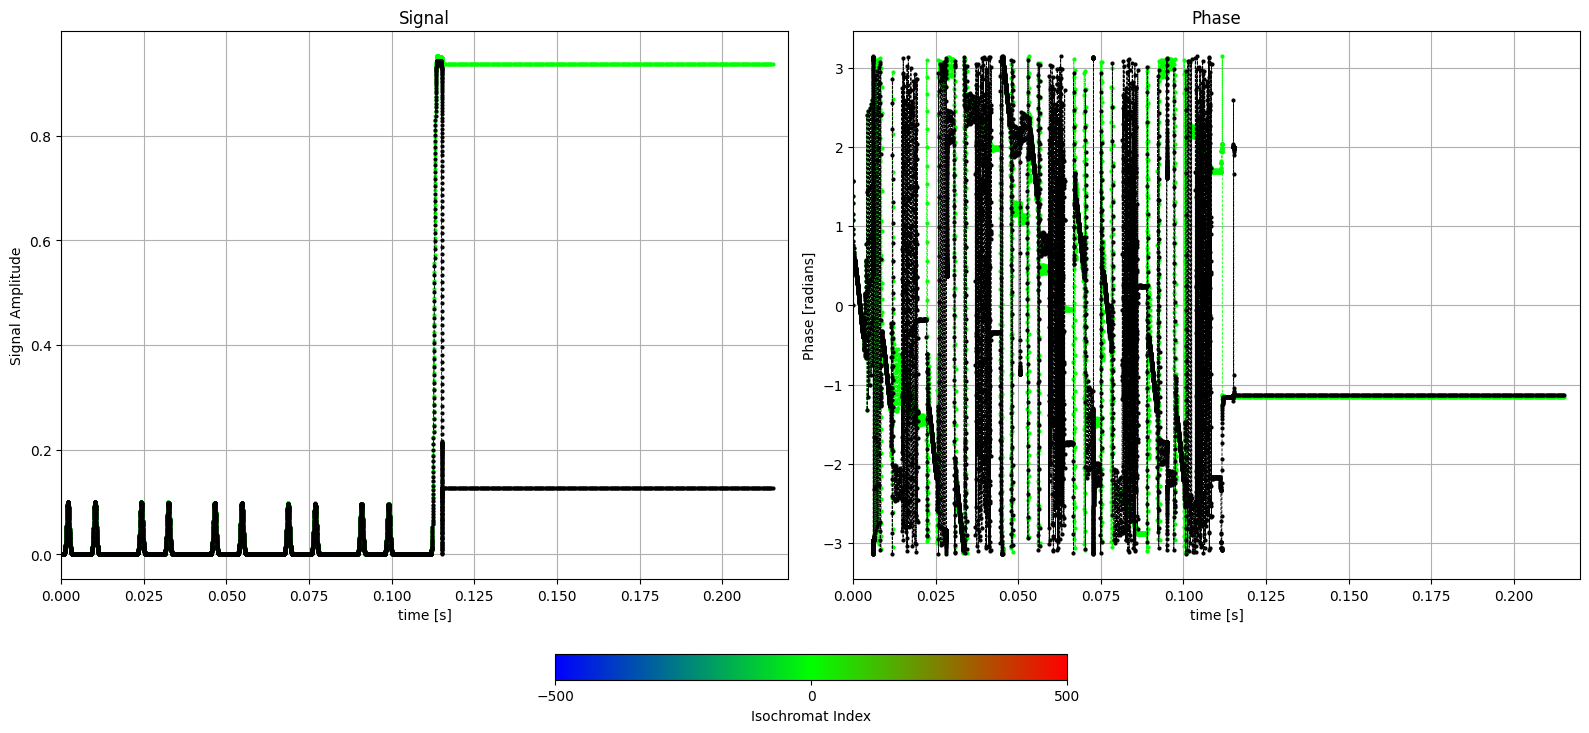

In [16]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag()

iso_select = [0]
plt_range = [0, 0.22]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c.cpu(), m_c_total.cpu()], time=time.cpu(), plt_range=plt_range, iso_select=iso_select)



### Animation

In [14]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = True
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [15]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag, 
#             **kwargs)